In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os
from glob import glob

In [3]:
# train_path = '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training'
# validation_path='/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Validation'
# test_path='/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Testing'

In [4]:
# train_path

In [5]:
# # from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def custom_preprocessing(image):
#     # Add your custom preprocessing steps here
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Example: Convert BGR to RGB
#     return image

# datagen = ImageDataGenerator(
#     rescale=1./255,
#     preprocessing_function=custom_preprocessing  # Apply custom preprocessing
# )


# # Load training data
# train_generator = datagen.flow_from_directory(
#     '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training',
#     target_size=(224, 224),  # Adjust size according to your model's requirements
#     batch_size=32,  # Define a suitable batch size
#     class_mode='categorical',  # Adjust based on the labels
# )

# # Load validation data
# validation_generator = datagen.flow_from_directory(
#     '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Validation',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
# )

# # Define the test data generator
# # test_datagen = ImageDataGenerator(rescale=1./255)

# # Load test data
# test_generator = datagen.flow_from_directory(
#     '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Testing',
#     target_size=(224, 224),  # Same size as used in training
#     batch_size=32,  # Can be adjusted as needed
#     class_mode='categorical',
#     shuffle=False  # Important to keep order for evaluation
# )


In [6]:
# def custom_preprocessing(image):
#     # Add your custom preprocessing steps here
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Example: Convert BGR to RGB
#     return image

# Define the image data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images
    # preprocessing_function=custom_preprocessing,
    # rotation_range=20,  # Rotate the image by up to 20 degrees
    # width_shift_range=0.2,  # Shift the image horizontally by up to 20% of the width
    # height_shift_range=0.2,  # Shift the image vertically by up to 20% of the height
    # shear_range=0.15,  # Shear the image by up to 15%
    # zoom_range=0.15,  # Zoom in or out by up to 15%
    # horizontal_flip=True,  # Flip the image horizontally
    # fill_mode='nearest'  # Fill in missing pixels after rotation or shift
)

# Load training data with augmentation
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training',
    target_size=(224, 224),  # Adjust size according to your model's requirements
    batch_size=32,  # Define a suitable batch size
    class_mode='categorical',  # Adjust based on the labels
)

# Validation and test generators typically don't need augmentation
# Create them without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

# Test data generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [7]:
for class_name, label in train_generator.class_indices.items():
    print(f"Class: {class_name}, Label: {label}")

Class: CaS, Label: 0
Class: CoS, Label: 1
Class: Gum, Label: 2
Class: MC, Label: 3
Class: OC, Label: 4
Class: OLP, Label: 5
Class: OT, Label: 6


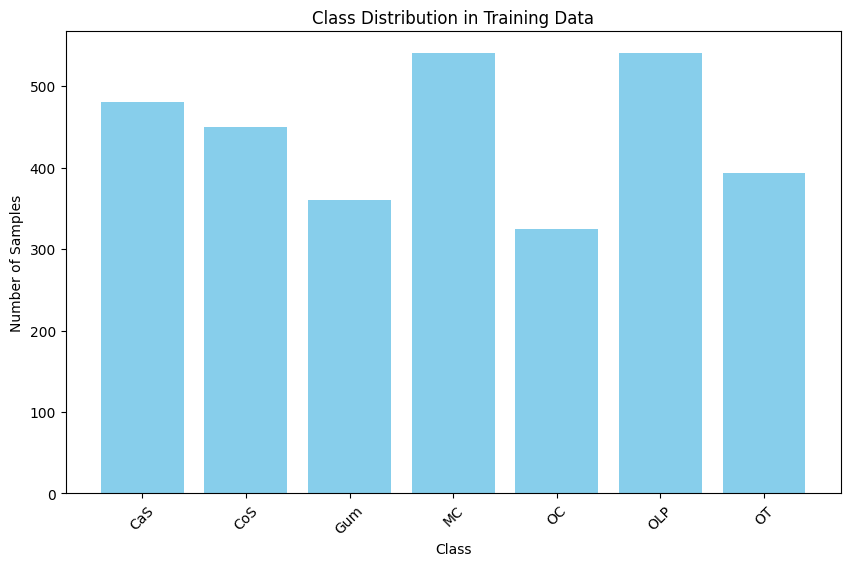

In [8]:
# Get class labels from the generator
class_labels = list(train_generator.class_indices.keys())

# Count the number of samples per class
class_counts = np.bincount(train_generator.classes)

# Plotting the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()


In [9]:
from sklearn.utils.class_weight import compute_class_weight

# Get class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert to dictionary format
class_weights = dict(enumerate(class_weights))

class_weights

{0: 0.91875,
 1: 0.98,
 2: 1.225,
 3: 0.8166666666666667,
 4: 1.3611111111111112,
 5: 0.8166666666666667,
 6: 1.1221374045801527}

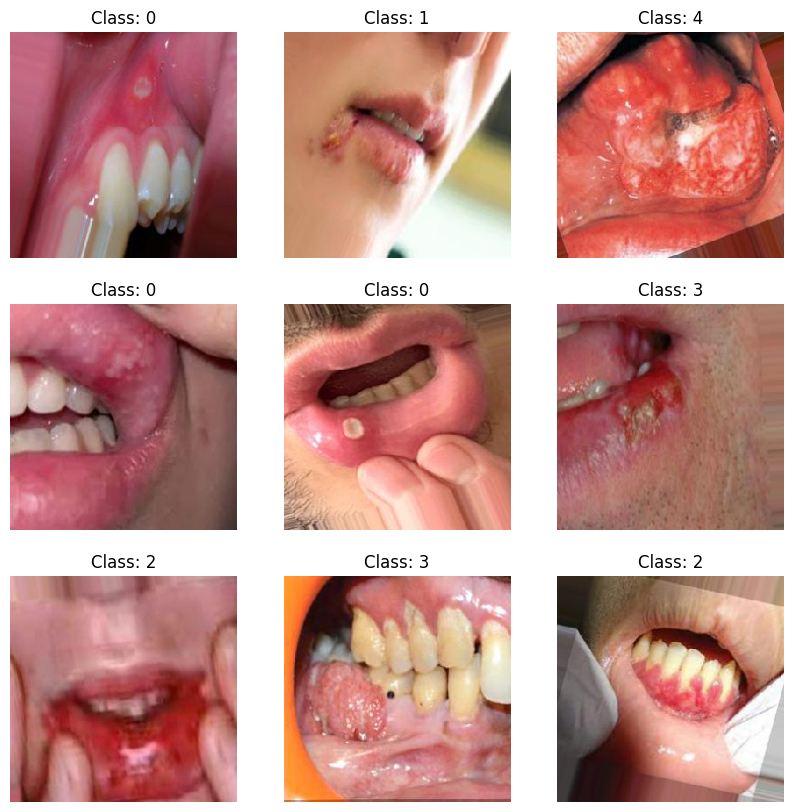

In [10]:
# # Get a batch of images and labels
images, labels = next(train_generator)

# Display a grid of images
plt.figure(figsize=(10, 10))

# Adjust the number of images to display
for i in range(9):  # Displaying a 3x3 grid (you can change the range)
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i].argmax()}")  # Display the class label
    plt.axis('off')

plt.show()


# Get a batch of images from the generator
# images, labels = next(train_generator)

# # Display a grid of augmented images
# plt.figure(figsize=(10, 10))

# for i in range(9):  # Displaying a 3x3 grid
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i])
#     plt.title("Augmented Image")
#     plt.axis('off')

# plt.show()


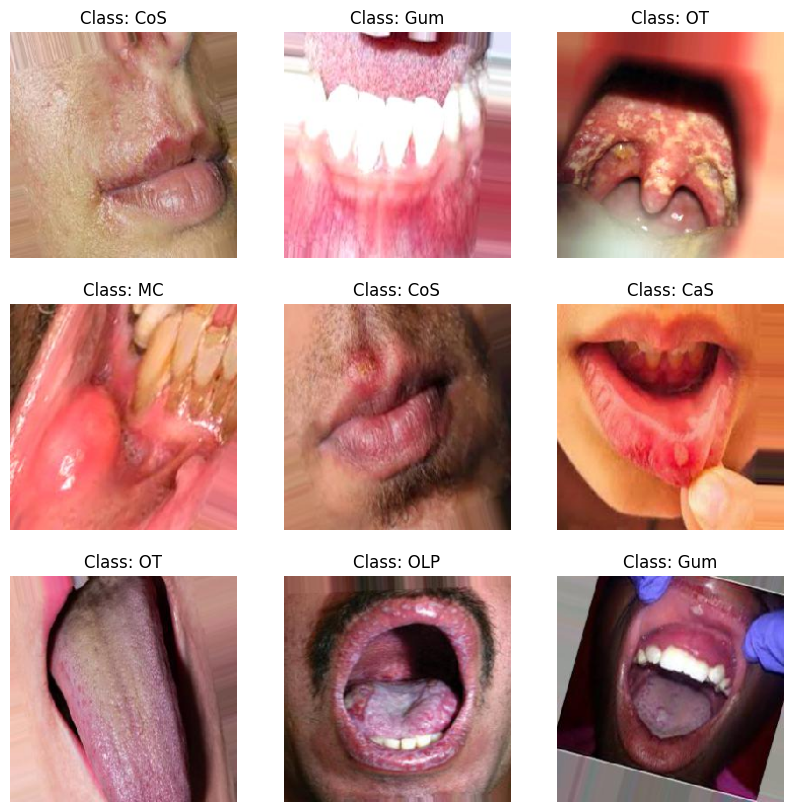

In [11]:

# Create a mapping from class indices to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Get a batch of images and labels
images, labels = next(train_generator)

# Display a grid of images
plt.figure(figsize=(10, 10))

# Adjust the number of images to display
for i in range(9):  # Displaying a 3x3 grid (you can change the range)
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])

    # Get the original class label
    label_index = labels[i].argmax()  # Convert one-hot back to class index
    label_name = class_labels[label_index]  # Get the original class name

    plt.title(f"Class: {label_name}")
    plt.axis('off')

plt.show()


In [12]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50

In [13]:
# # Load VGG16 with pre-trained weights, excluding the top (fully connected) layers
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freeze the base model layers
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Add custom top layers
x = base_model_vgg16.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions_vgg16 = Dense(train_generator.num_classes, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions_vgg16)



In [14]:

model_vgg16.compile(optimizer=Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [15]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:

history_vgg16 = model_vgg16.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 49s 342ms/step - accuracy: 0.3640 - loss: 2.3173 - val_accuracy: 0.6848 - val_loss: 0.9298
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.7747 - loss: 0.7144 - val_accuracy: 0.7733 - val_loss: 0.6725
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - accuracy: 0.9239 - loss: 0.3700 - val_accuracy: 0.8278 - val_loss: 0.5528
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.9658 - loss: 0.2065 - val_accuracy: 0.8453 - val_loss: 0.4560
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.9883 - loss: 0.1222 - val_accuracy: 0.8755 - val_loss: 0.3942
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.9953 - loss: 0.0707 - val_accuracy: 0.8872 - val_loss: 0.3452
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.9999 - loss: 0.0435 - val_accuracy: 0.8881 - val_loss: 0.3239
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 1.0000 - loss: 0.0313 - val_accuracy: 0.899

## with regulraization yo handle overfitting

In [17]:
base_model_vgg16_reg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model_vgg16_reg.layers:
    layer.trainable = False


x = base_model_vgg16_reg.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)  # Add regularization
x = Dropout(0.5)(x)
predictions_vgg16 = Dense(train_generator.num_classes, activation='softmax')(x)


model_vgg16_reg = Model(inputs=base_model_vgg16_reg.input, outputs=predictions_vgg16)

In [18]:

model_vgg16_reg.compile(optimizer=Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [19]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:

history_vgg16 = model_vgg16_reg.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 25s 218ms/step - accuracy: 0.2813 - loss: 2.1084 - val_accuracy: 0.4387 - val_loss: 1.4985
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.3761 - loss: 1.5230 - val_accuracy: 0.5321 - val_loss: 1.3564
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.3966 - loss: 1.4299 - val_accuracy: 0.5934 - val_loss: 1.2815
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.4353 - loss: 1.3582 - val_accuracy: 0.6255 - val_loss: 1.1588
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.4859 - loss: 1.2239 - val_accuracy: 0.6702 - val_loss: 1.0657
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.4914 - loss: 1.1733 - val_accuracy: 0.6907 - val_loss: 0.9590
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.5138 - loss: 1.1356 - val_accuracy: 0.7160 - val_loss: 0.8674
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - accuracy: 0.5517 - loss: 1.0500 - 

In [35]:

base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model_resnet50.layers:
    layer.trainable = False


x = base_model_resnet50.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions_resnet50 = Dense(train_generator.num_classes, activation='softmax')(x)
model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions_resnet50)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [36]:

model_resnet50.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [37]:

history_resnet50 = model_resnet50.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.1694 - loss: 4.8917 - val_accuracy: 0.1751 - val_loss: 1.9456
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.1699 - loss: 1.9476 - val_accuracy: 0.1751 - val_loss: 1.9457
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.1402 - loss: 1.9447 - val_accuracy: 0.1751 - val_loss: 1.9457
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.1514 - loss: 1.9596 - val_accuracy: 0.1751 - val_loss: 1.9457
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.1353 - loss: 1.9470 - val_accuracy: 0.1751 - val_loss: 1.9455
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.1471 - loss: 1.9484 - val_accuracy: 0.1751 - val_loss: 1.9456
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - accuracy: 0.1522 - loss: 1.9429 - val_accuracy: 0.1751 - val_loss: 1.9457
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.1577 - loss: 1.9476 - val_accu

## handle

In [ ]:

def plot_metrics(history_vgg16, history_resnet50):
    # Plotting accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history_vgg16.history['accuracy'], label='VGG16 Train')
    plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Val')
    plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Train')
    plt.plot(history_resnet50.history['val_accuracy'], label='ResNet50 Val')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history_vgg16.history['loss'], label='VGG16 Train')
    plt.plot(history_vgg16.history['val_loss'], label='VGG16 Val')
    plt.plot(history_resnet50.history['loss'], label='ResNet50 Train')
    plt.plot(history_resnet50.history['val_loss'], label='ResNet50 Val')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



In [ ]:

plot_metrics(history_vgg16, history_resnet50)

NameError: name 'history_vgg16' is not defined

In [ ]:

def evaluate_on_test_set(model, test_generator):

    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes


    print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    return cm


In [ ]:

print("VGG16 Test Evaluation:")
cm_vgg16_test = evaluate_on_test_set(model_vgg16, test_generator)

In [ ]:
print("\nResNet50 Test Evaluation:")
cm_resnet50_test = evaluate_on_test_set(model_resnet50, test_generator)

In [ ]:
import seaborn as sns


def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
# Plot confusion matrices for the test set
plot_confusion_matrix(cm_vgg16_test, "VGG16 (Test Set)")
plot_confusion_matrix(cm_resnet50_test, "ResNet50 (Test Set)")
